# Monte Carlo Method and Importance Sampling

---

## Navigation

1. [Monte Carlo Method](#Monte-Carlo-Method)
   - [$\pi$ Approximation](#$\pi$-Approximation)
   - [Difficult Math - Easy Solution](#Difficult-Math---Easy-Solution)
1. [Importance Sampling](#Importance-Sampling)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
from matplotlib.animation import FuncAnimation

sns.set_style("ticks")
%matplotlib notebook

## Monte Carlo Method

[Top](#Navigation)

[Monte Carlo (MC) simulations](https://en.wikipedia.org/wiki/Monte_Carlo_method) are a broad class of algorithms that utilize repeated random sampling to obtain numerical results. 

Typically, the MC methods consist of the following steps:

1. Define a domain of possible inputs
1. Randomly sample inputs from a probability distribution over the domain
1. Perform a deterministic computation on the inputs
1. Aggregate the results


We will demonstrate the power and simplicity of the method using two examples:

   - $\pi$ approximation.
   - What is the expected distance between two randomly sampled points from a uniform distribution over the n-dimensional unit cube?

### $\pi$ Approximation

[Top](#Navigation)

This is a well-known example of the use of the MC method.

<IPython.core.display.Javascript object>


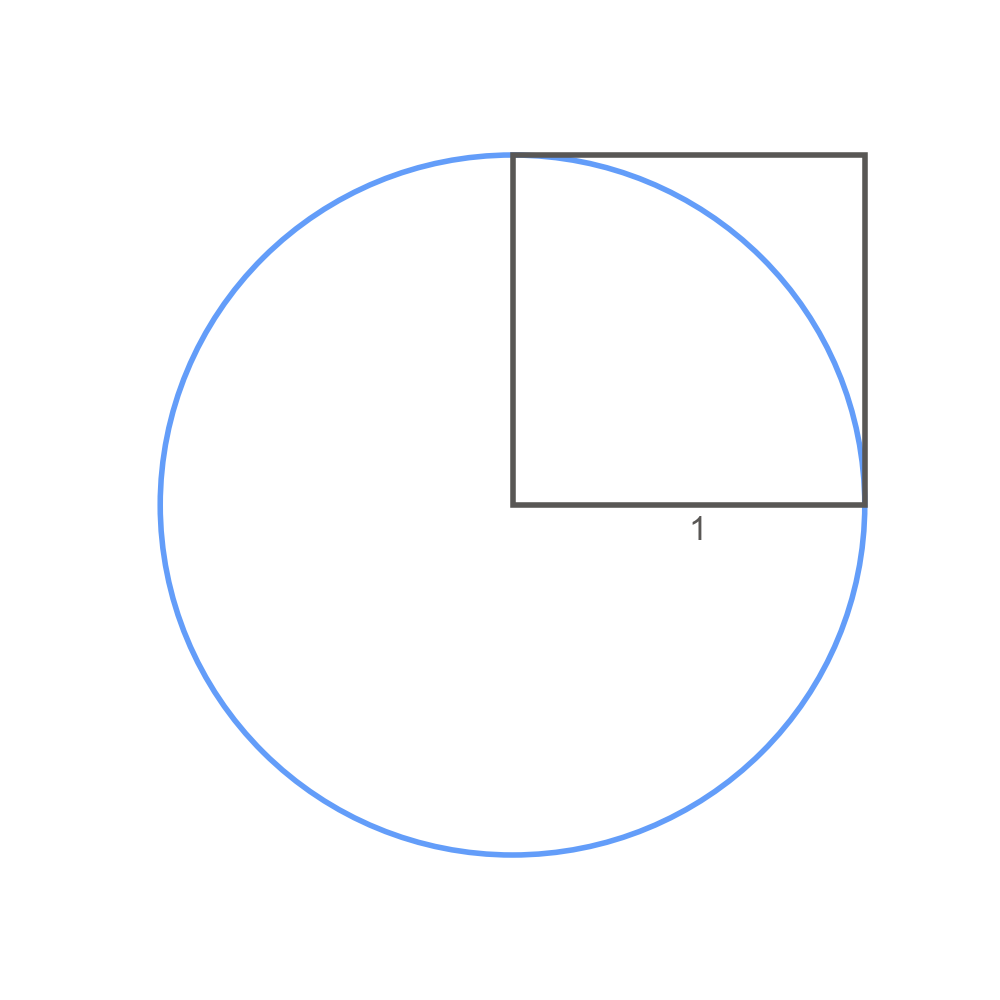

In [2]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

circ = plt.Circle((0, 0), radius=1, linewidth=2, edgecolor='#639df9', facecolor='none')
square1 = plt.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='#595755',facecolor='none')
ax.add_patch(circ)
ax.add_patch(square1)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axis('off')
plt.text(.5, -.1, '1', fontsize = 12, color = "#595755") # text
plt.show()

Consider the quadrant of the unit disk and its bounding unit square, as in the plot above. The ratio of their areas is $\frac{\pi}{4}$.

Thus, the value of $\pi$ can be approximated using an MC simulation:

1. Draw random samples from a uniform distribution over the unit dist
1. The ratio of points inside the quadrant is an estimate of the ratio of the two areas, $\frac{\pi}{4}$.

In [3]:
class approxPi(object):
    def __init__(self, ax, radius = 1, N = 10**4):
        self.ax = ax
        self.radius = radius
        self.N = N
        self.x = np.zeros(N)
        self.y = np.zeros(N)
        self.ins = np.zeros(N)
        self.draws = 0
        # set plot
        self.init_plot()
        
        
    def init_plot(self):
        self.ax.set_xlim(-self.radius * 1.1, self.radius * 1.1)
        self.ax.set_ylim(-self.radius * 1.1, self.radius * 1.1)
        circ = plt.Circle((0, 0), radius=self.radius, linewidth=1.5, 
                          edgecolor='#639df9', facecolor='#c6c8d1', alpha = .1)
        square = plt.Rectangle((0, 0), self.radius, self.radius, linewidth=1.5, 
                                edgecolor='#595755',facecolor='none')
        self.ax.add_patch(circ)
        self.ax.add_patch(square)
        self.ax.set_axis_off()
        self.ax.set_title("")
        
    def init(self):
        self.ax.clear()
        self.init_plot()
        return self.ax.scatter([], []),
    
    
    def isIn(self, x = None, y = None):
        if x is None or y is None:
            x = self.x
            y = self.y
        return (x**2 + y**2 <= self.radius)
    
    def draw(self, size = 1):
        return (np.random.uniform(high = self.radius, size = int(size)),
               np.random.uniform(high = self.radius, size = int(size)))

    def __call__(self, n):
        n = int(n)
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if n == 0:
            return self.init()
        
        diff = n - self.draws
        xs, ys = self.draw(size = diff)
        self.x[self.draws:n] = xs
        self.y[self.draws:n] = ys
        self.ins = self.isIn(self.x, self.y)
        # update num draws
        self.draws = n
        self.ax.set_title(r"N = {0}, $\pi\approx${1:.5f}".format(n, self.ins[:n].sum() * 4 / n))
        return self.ax.scatter(self.x[:n], self.y[:n]
                               ,c = ['#639df9' if x == 1 else '#fcc480' for x in self.ins[:n]]
                               ,alpha = .25
                               ,s = .5
                              )

<IPython.core.display.Javascript object>


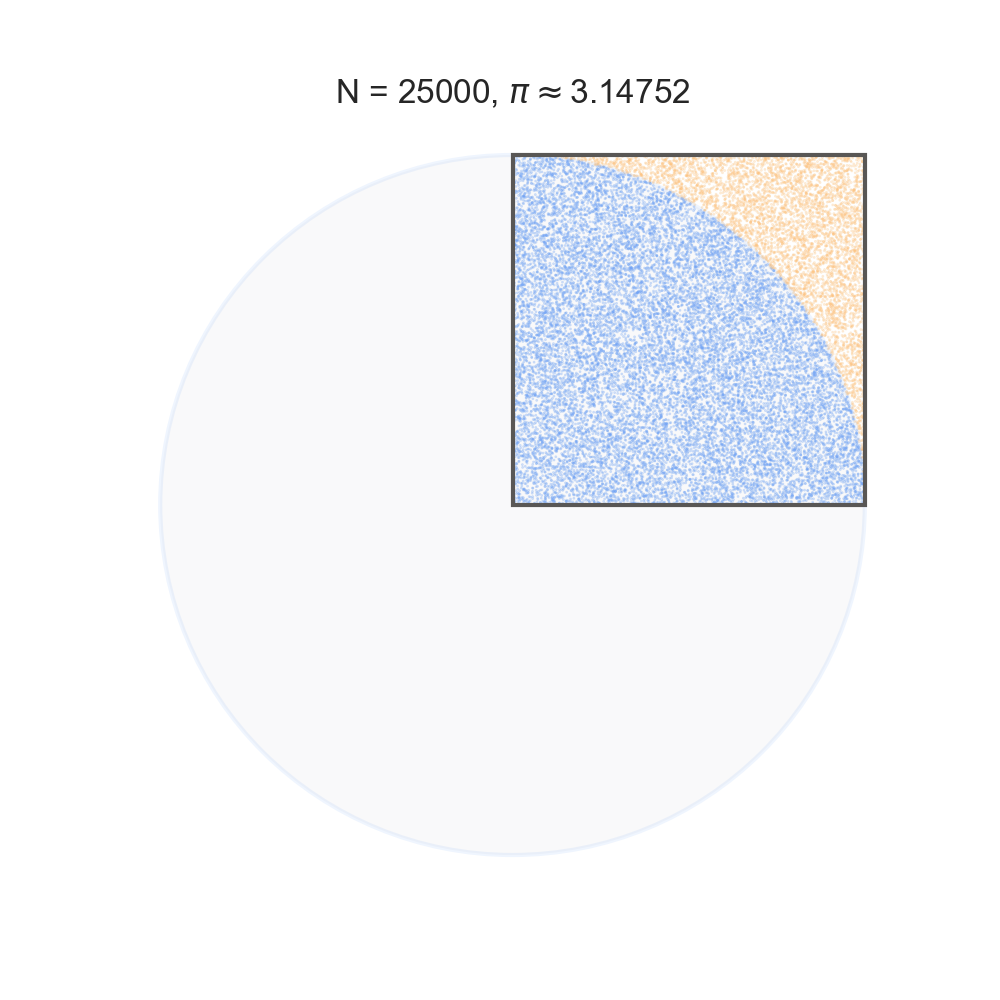

In [4]:
np.random.seed(123)
SAVE = True                       # save .gif?
path = '../images/mc-pi.gif'      # path
fig, ax = plt.subplots(figsize = (5, 5))

range_list = np.arange(0, 2.5e+4+1, 1e+3)
N = np.max(range_list)
app_pi = approxPi(ax, N = int(N))

anim = FuncAnimation(fig, app_pi, frames = range_list, 
                     init_func = app_pi.init, interval = 100,
                     blit = True, repeat = False)

if SAVE:
    anim.save(path, dpi=80, writer='imagemagick') # you must install imagemagick
                                                  # in order to save .gif
else:
    plt.show()

### Difficult Math - Easy Solution

[Top](#Navigation)

Consider the problem of computing the expected distance between a two randomly sampled points from a uniform distribution over the $n-$dimensional unit square. This can be done by solving the following integral, 

$$\Delta(n)=\intop_0^1\dots\intop_0^1\sqrt{\sum_{k=1}^n{\left(x_{1,i}-x_{2,i}\right)^2}}dx_{1,1}\dots dx_{1,n} \cdot dx_{2,1}\dots dx_{2,n}$$

Yes, it's possible to solve this analytically for small values of $n$, but it will be more fun (and much easier) to solve this using an MC simulation.

As an example, we use $n=3$. The above integral evalutes to $\approx 0.661707$ (thanks [WolframAlpha](http://mathworld.wolfram.com/HypercubeLinePicking.html)).

In [5]:
def random_dist(N = 10**4, dim = 3):
    """
    ...
    """
    points = np.random.random(size = N * dim * 2) # sample dim * n * 2 obs. ~ Unif(0,1)
    x1, x2 = points[:N * dim], points[N * dim:]
    return np.linalg.norm(x1.reshape(N, dim) - x2.reshape(N, dim), axis = 1)

<IPython.core.display.Javascript object>


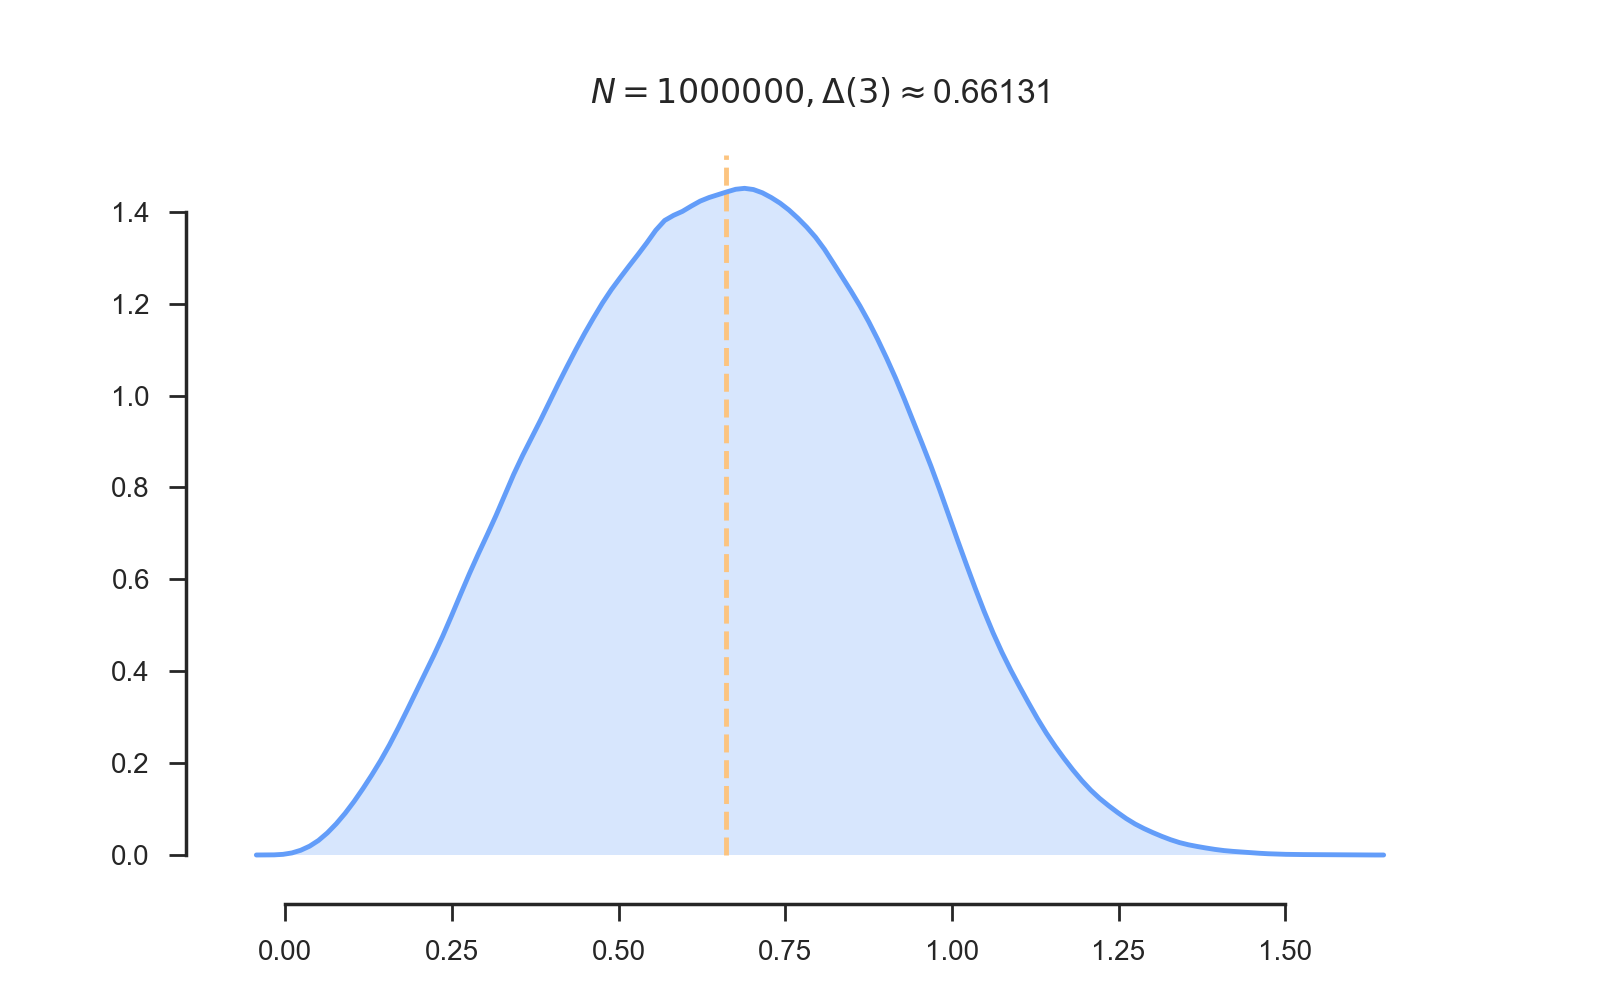

In [6]:
np.random.seed(123)
N = 10 ** 6
dists = random_dist(N = N)
md = dists.mean()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
sns.kdeplot(dists, shade = True, color = "#639df9")
ax.vlines(md, 0, ax.axis()[-1], color = '#fcc480', linestyles = 'dashed')
ax.set_title(r'$N = {0}, \Delta(3)\approx${1:.5f}'.format(N, md))
sns.despine(offset = 5, trim = True)
sns.despine()

---

**Not bad!**

Above, we demonstrate the use of Monte Carlo integration, in which we are interested in the solution for,

$$I=\intop_a^b h(y)dy$$

We then write $h(y)=g(y)\cdot f(y)$, where $f$ is some density function over $(a,b)$. Hence, 

$$I=\intop_a^b h(y)dy=\intop_a^b g(y)\cdot f(y)dy=\mathbb{E}_f\left[g(y) \right]$$

Now, using the Law of Large Numbers, we have, 

$$\hat{I}=N^{-1}\sum_{i=1}^N g(y_i)\overset{N\to\infty}{\longrightarrow}I$$

where $y_1,...,y_N \sim f$ *i.i.d*.

---

## Importance Sampling

[Top](#Navigation)

Monte Carlo methods are great if we can sample from the target distribution, but what if we can’t?
**Importance Sampling (IS) to the rescue!**

The idea of IS is simple: sample the data from another distribution, $f^*$ and re-weight the integral,

$$I=\intop_a^b g(y)\cdot f(y)dy = \intop_a^b \frac{g(y)\cdot f(y)}{f^*(y)}f^*(y)dy = \mathbb{E}_{f^*}\left[\frac{g(y)\cdot f(y)}{f^*(y)} \right]$$

Thus, 

$$\hat{I}=N^{-1}\sum_{i=1}^N g(y_i)\frac{f(y_i)}{f^*(y_i)}$$

We refer to $w_i=\frac{f(y_i)}{f^*(y_i)}$ as the importance weights. Aside from cases where we simply cannot obtain samples from the original distribution, IS can be used to reduce the variance of MC simulations.

---

**Example:** Say we want to estimate the probability that a standard normal variable $X$ is larger than 3, i.e. $P(X>3)$. A straightforward use of MC would be to sample $x_1, ..., x_N \sim N(0,1)$, and compute, 

$$N^{-1}\sum_i I_{\{x_i>3\}}$$

where I is the indicator function. We will re-weight this calculation using a shifted normal distribution, with mean 3.

<IPython.core.display.Javascript object>


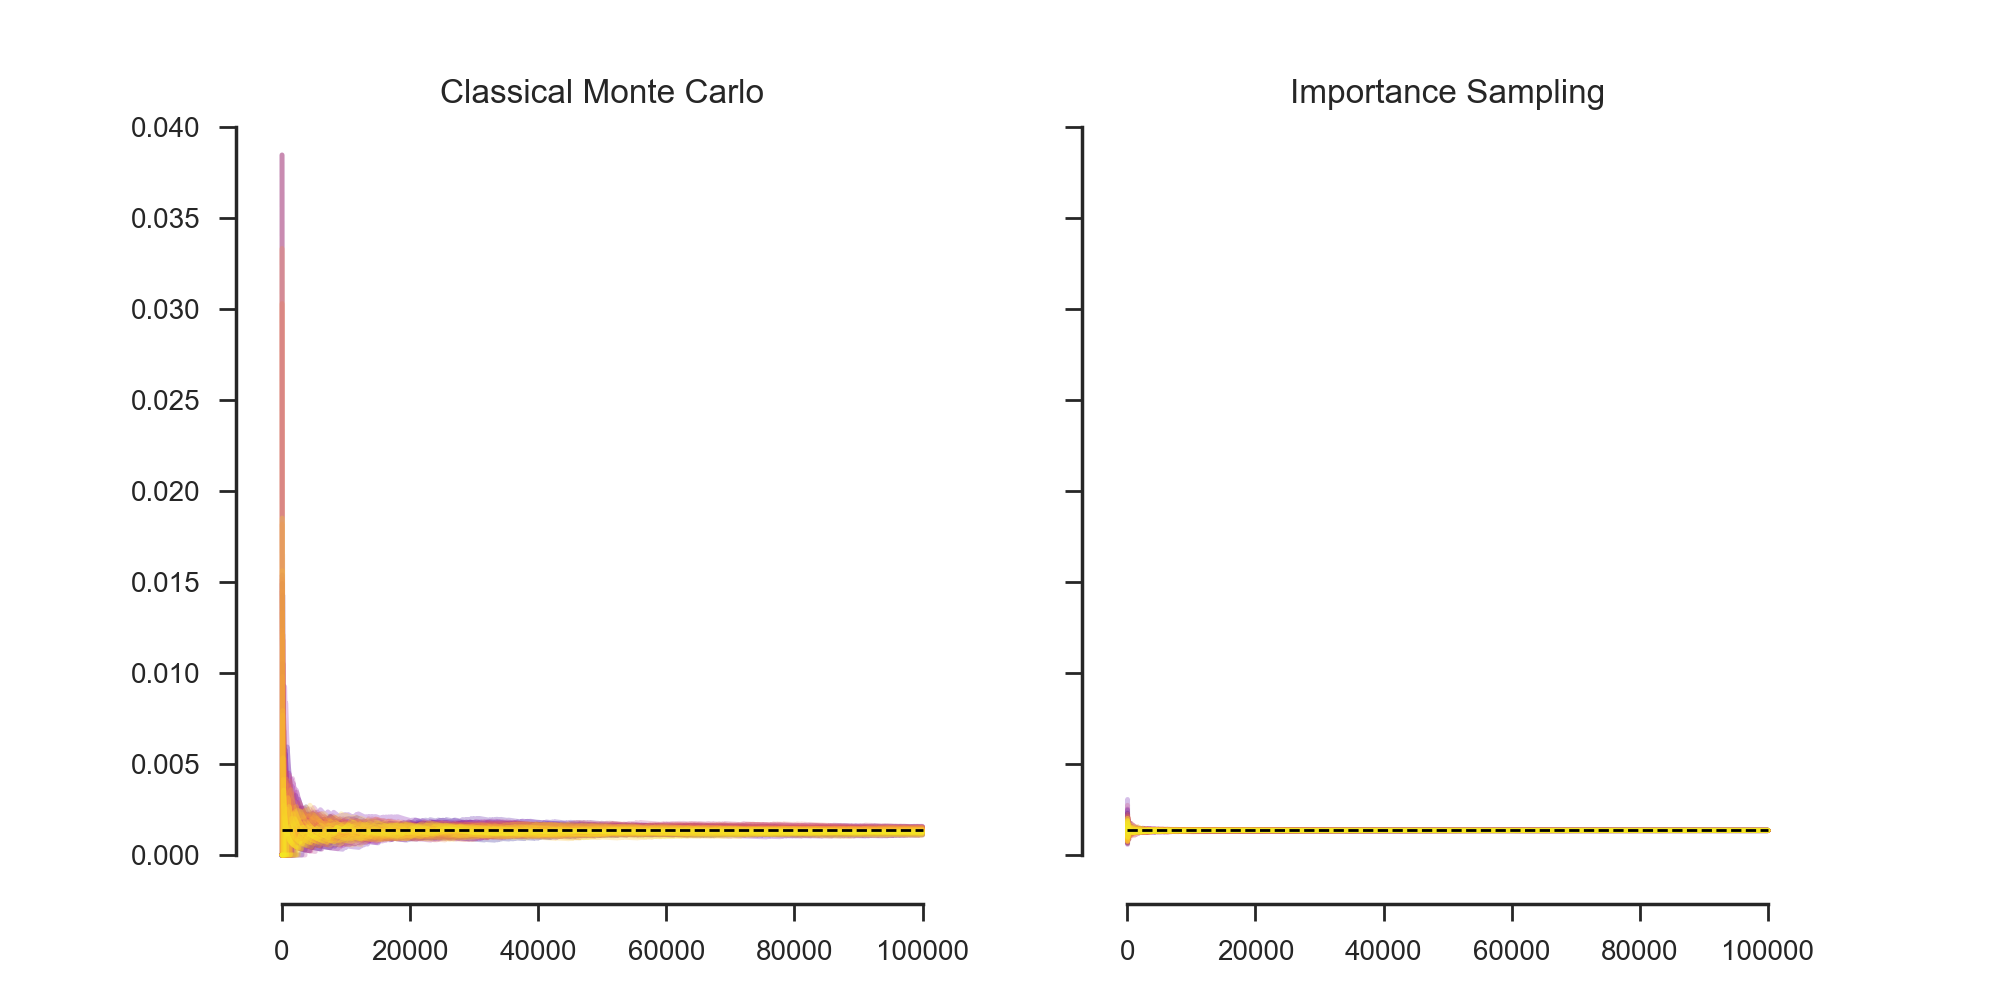

In [7]:
np.random.seed(123)
N =  10**5
reps = 100
start_at = 25
true_prob = 1 - norm.cdf(3)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
colormap = get_cmap('plasma')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1, 1 / reps)]
alpha = .25

for i, r in enumerate(range(reps)):
    mc_rand = np.random.normal(size = N)
    is_rand = np.random.normal(loc = 3, size = N)
    w_i = norm.pdf(is_rand) / norm.pdf(is_rand, loc = 3)
    ax1.plot(range(start_at, N), pd.Series((mc_rand > 3)).expanding().mean()[start_at:], 
             color = colors[i], alpha = alpha, zorder = i)
    ax2.plot(range(start_at, N), pd.Series((is_rand > 3) * w_i).expanding().mean()[start_at:], 
             color = colors[i], alpha = alpha, zorder = i)
    
    
ax1.hlines(true_prob, start_at, N, lw = 1, 
           linestyles = "dashed", zorder = reps+1)
ax2.hlines(true_prob, start_at, N, lw = 1, 
           linestyles = "dashed", zorder = reps+1)
ax1.set_title('Classical Monte Carlo')
ax2.set_title('Importance Sampling')

sns.despine(offset = 5, trim = True)
sns.despine()

The above plot shows 100 trajectories of classical Monte Carlo and IS. The horizontal dashed line shows the actual probability of $P(X>3)$. From the above, it's clear that the variance of the estimator is larger for the classical MC method compared to IS.